In [2]:
import sys
import numpy as np
import networkx as nx
from scipy.stats import bernoulli

from matplotlib import pyplot as plt

from tag2hierarchy.hierarchy import HTMLPLOT
from tag2hierarchy.hierarchy import tree2Dict
from tag2hierarchy.hierarchy import treeHandlers

sys.path.append("../../../")
from graph_dynamics.networks.communities import HierarchicalMixedMembership
%matplotlib notebook
%matplotlib inline

Obtaining communities for:  A
Obtaining communities for:  B
Obtaining communities for:  C


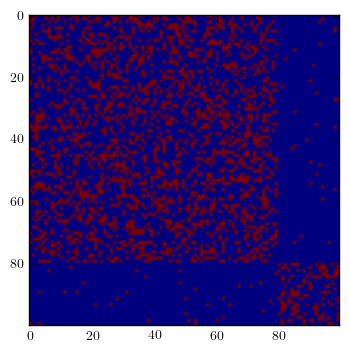

In [3]:
#DEFINE HIERARCHY
dictTree = {"name":"A","children":[{"name":"B","children":[{"name":"E","children":None},
                                                           {"name":"F","children":None}]},
                                   {"name":"C","children":[{"name":"G","children":None},
                                                           {"name":"H","children":None}]},
                                   {"name":"D","children":[{"name":"I","children":None},
                                                           {"name":"J","children":None}]}],
                                    

#dictTree = {"name":"A","children":[{"name":"B","children":None},
#                                   {"name":"C","children":None}]}


hierarchy = tree2Dict.fromDictTreeToObjectTree([dictTree])
treeHandlers.setBranch(hierarchy)

#DEFINE GRAPH
numberOfNodes = 100
backgroundProbability = 0.98
inheritanceProbability = 0.7
dirichlet_prior = 3.


HMM = HierarchicalMixedMembership(numberOfNodes,
                                    hierarchy,
                                    backgroundProbability,
                                    inheritanceProbability,
                                    dirichlet_prior)

adjancecy_matrix = HMM.get_adjancency_matrix()
P = HMM.get_probabilities()
plt.imshow(adjancecy_matrix)
plt.show()

In [29]:
treeHandlers.obtainMyLevel(hierarchy[0].children[1])

1

# Node2Vec Detection

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


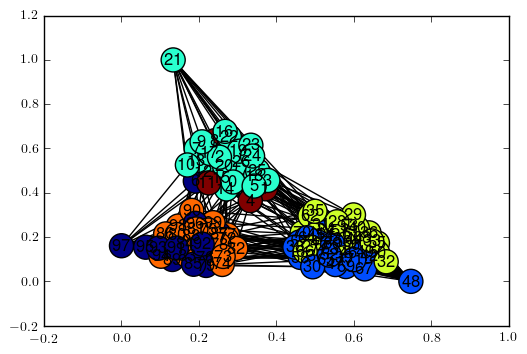

In [34]:
from graph_dynamics.embeddings import node2vec
from graph_dynamics.embeddings import utils

args = {"input":"../../data/graph/karate.edgelist",
         "dimensions":128,
         "directed":False,
         "p":0.001,
         "q":5,
         "num_walks":10,
         "walk_length":80,
         "window_size":10,
         "workers":8,
         "iter":1,
         "weighted":False,
         "undirected":True,
         "output":"../../../data/emb/hmm.emb"} 

number_of_clusters = 6
nx_G = HMM.get_networkx()

G = node2vec.Graph(nx_G, 
                   args["directed"], 
                   args["p"], 
                   args["q"])

G.preprocess_transition_probs()

walks = G.simulate_walks(args["num_walks"], 
                         args["walk_length"])

node2vec.learn_embeddings(walks,args)
utils.clusterEmbeddings(nx_G, args["output"],number_of_clusters)